![test](blob.png)

' refers to the blob frame

AB=$\beta_{\Gamma}$ c $\Delta T_e=\Gamma_{\beta} c \Delta T'_e$

$\delta= \frac{1}{\Gamma_{\beta}(1-\beta_{\gamma} cos(\theta)} $

$\Delta T_a=\Delta T_e (1-\beta_{\gamma} cos(\theta)$


$\Delta T_a=\Delta T'_e \Gamma_{\beta}(1-\beta_{\gamma} cos(\theta)$

$\Delta T_a=\Delta T'_e /\delta$


AB=$\beta$ c $\Gamma_{\beta} \Delta T'_e$ 

$\Delta T_e= \Delta T_e \delta$

$\Delta T_e= \Delta T_a \delta \Gamma_{\beta}$

AB= $\beta_{\Gamma}$ c $\Gamma_{\beta}\delta \Delta T_a$

$\Delta T_a$ = obs delay

$\Delta T'_e$ = time in blob rest frame during the obs delay

$AB$ =$\Delta_r$

In [1]:
from astropy.units import Unit as u
from astropy import constants 
import numpy as np

In [2]:
def Gamma_to_beta(Gamma):
    return np.sqrt(1-(1/(Gamma*Gamma)))

In [3]:
def eval_beaming(Gamma,theta):
    beta=Gamma_to_beta(Gamma)
    return 1/(Gamma*(1-(beta*np.cos(theta))))


In [4]:
def eval_AB(obs_delay,BulckFactor,theta):
    beta_gamma=Gamma_to_beta(BulckFactor)
    beaming=eval_beaming(BulckFactor,theta)
    return obs_delay*beta_gamma*3E10*beaming*BulckFactor

In [5]:
def delta_t_obs_to_blob(delta_obs,beaming):
    return delta_obs*beaming

In [6]:
def eval_R(R0,beta_exp,t_obs,beaming):
    return R0+beta_exp*3E10*delta_t_obs_to_blob(t_obs,beaming)

In [7]:
delta_t_obs=np.logspace(1,3,5)*u('d')
BulckFactor=25
theta=np.deg2rad(1.5)
R0=5E15
R_H0=1E17


Text(0.5, 0, 'Delta r (pc)')

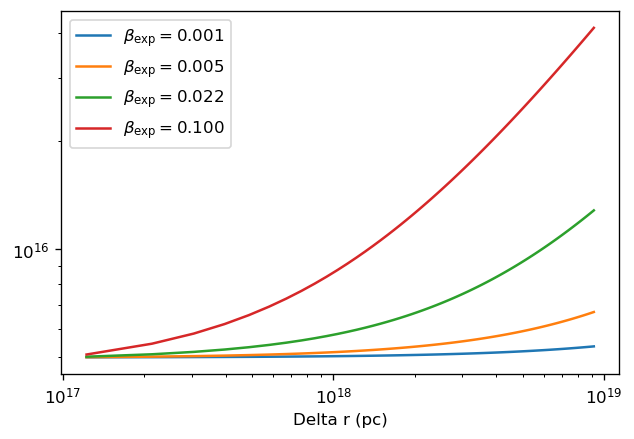

In [8]:
size=4
#Delta_r=np.zeros(size)
#R=np.zeros(size)
#delta_t_obs=np.logspace(1,5,100)*u('d')
delta_t_obs=np.linspace(0.01,4,100)*u('d')
beaming=eval_beaming(BulckFactor,theta)

fig=plt.figure(dpi=120)

for ID,beta_exp in enumerate(np.logspace(-3,-1,size)):
    #print(beta_exp)
    Delta_r=eval_AB(delta_t_obs.to('s').value,BulckFactor,theta)+R_H0
    R=eval_R(R0,beta_exp,delta_t_obs.to('s').value,beaming)
    plt.loglog(Delta_r,R,label=r'$\beta_{\rm exp}=%2.3f$'%beta_exp)

#Dr=eval_AB( np.logspace(1,2,2)*86400,BulckFactor,theta)/3E18
#plt.axvspan(Dr[0],Dr[1], alpha=0.2, color='green')
plt.legend(loc='best')
plt.xlabel('Delta r (pc)')
#plt.ylabel('R blob (pc)')

In [9]:
from jetset.jet_timedep import JetTimeEvol
from jetset.jet_model import Jet
duration=1.2E7
jet_rad=Jet(beaming_expr='bulk_theta')
jet_rad.parameters.R.val=5E15
jet_rad.parameters.z_cosm.val=0.001
jet_rad.parameters.BulkFactor.val=25
jet_rad.parameters.theta.val=1.5
temp_ev=JetTimeEvol(jet_rad=jet_rad)
temp_ev.parameters.t_jet_exp.val=0
temp_ev.parameters.duration.val=duration
temp_ev.parameters.beta_exp_R.val=0.01
T_SIZE=np.int(duration/1000)
temp_ev.parameters.t_size.val=T_SIZE
temp_ev.region_expansion='on'
temp_ev.init_TempEv()


==> par: z_cosm from model: jet_leptonicacc_region linked to same parameter in model jet_leptonic


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/model_manager.py:147: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


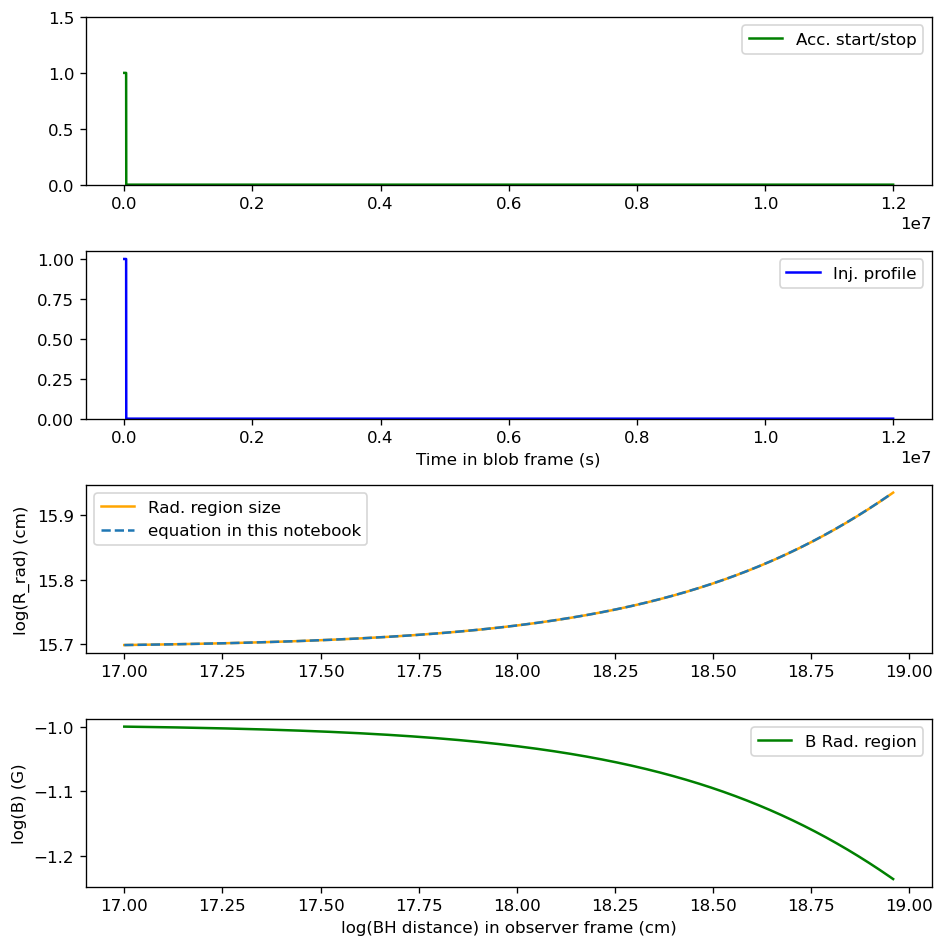

In [10]:
p=temp_ev.plot_time_profile()
beta_exp=0.01
R_H0=1E17
Delta_r=eval_AB(np.linspace(0,1E7/30,1000),BulckFactor,theta)+R_H0
R=eval_R(R0,beta_exp,np.linspace(0,1E7/30,1000),beaming)

p.axs[2].plot(np.log10(Delta_r),np.log10(R),'--',label='equation in this notebook')
p.axs[2].legend()

In [11]:
def conical_profile(Dr,k,R_H0,R0):
    return R0*(Dr-R_H0)**k+R0

In [12]:
def Rs_radius(M_s):
    return 2*M_s*constants.M_sun.to('g')*constants.G.cgs/(constants.c.cgs**2)

beaming 35.004168924104064


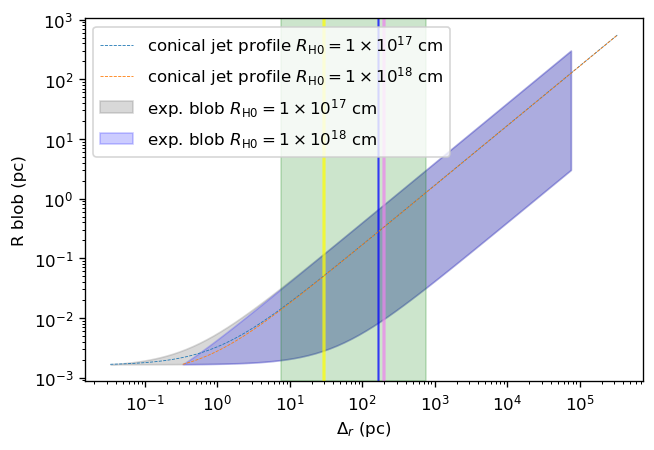

In [13]:
%matplotlib inline
size=3
#Delta_r=np.zeros(size)
#R=np.zeros(size)
delta_t_obs=np.logspace(-5,5,100)*u('d')
#delta_t_obs=np.linspace(0.01,7,100)*u('d')
beaming=eval_beaming(BulckFactor,theta)
R0=5E15
BulckFactor=25
theta=np.deg2rad(1.5)
fig=plt.figure(dpi=120)
beaming=eval_beaming(BulckFactor,theta)
print('beaming',beaming)

R_H0=1E17
Delta_r=eval_AB(delta_t_obs.to('s').value,BulckFactor,theta)+R_H0
y_min=eval_R(R0,0.001,delta_t_obs.to('s').value,beaming)
y_max=eval_R(R0,0.1,delta_t_obs.to('s').value,beaming)
plt.fill_between(Delta_r/3E18,y_max/3E18 ,y_min/3E18 ,color='gray',alpha=0.3,label=r'exp. blob $R_{\rm H0}=1 \times10^{17}$ cm')

R_H0=1E18
Delta_r=eval_AB(delta_t_obs.to('s').value,BulckFactor,theta)+R_H0
y_min=eval_R(R0,0.001,delta_t_obs.to('s').value,beaming)
y_max=eval_R(R0,0.1,delta_t_obs.to('s').value,beaming)
plt.fill_between(Delta_r/3E18,y_max/3E18 ,y_min/3E18 ,color='blue',alpha=0.2,label=r'exp. blob $R_{\rm H0}=1 \times10^{18}$ cm')



Dr=eval_AB( np.logspace(1,3,2)*86400,BulckFactor,theta)/3E18
plt.axvspan(Dr[0],Dr[1], alpha=0.2, color='green')




R_H0=1E17
#plt.axvline(R_H0/3E18,ls='--',lw='0.1')

Dr=np.logspace(np.log10(R_H0),np.log10(1E24),100)/3E18
cp=conical_profile(Dr,1,R_H0/3E18,R0/3E18)
plt.plot(Dr,cp,'--',label=r'conical jet profile $R_{\rm H0}=1 \times10^{17}$ cm',lw=0.5)
R_H0=1E18
Dr=np.logspace(np.log10(R_H0),np.log10(1E24),100)/3E18
cp=conical_profile(Dr,1,R_H0/3E18,R0/3E18)
plt.plot(Dr,cp,'--',label=r'conical jet profile $R_{\rm H0}=1 \times10^{18}$ cm',lw=0.5)


dt1_mrk421=eval_AB((38.4-1.3)*u('d').to('s'),BulckFactor,theta)+R_H0
dt2_mrk421=eval_AB((38.4+1.3)*u('d').to('s'),BulckFactor,theta)+R_H0
dt1_mrk501=eval_AB((224.2-3.9)*u('d').to('s'),BulckFactor,theta)+R_H0
dt2_mrk501=eval_AB((224.2+3.1)*u('d').to('s'),BulckFactor,theta)+R_H0
dt1_3C273=eval_AB((264.3-6.5)*u('d').to('s'),BulckFactor,theta)+R_H0
dt2_3C273=eval_AB((264.3+6.2)*u('d').to('s'),BulckFactor,theta)+R_H0

plt.axvspan(dt1_mrk421/3E18,dt2_mrk421/3E18, alpha=0.5, color='yellow')
plt.axvspan(dt1_mrk501/3E18,dt2_mrk501/3E18, alpha=0.5, color='blue')
plt.axvspan(dt1_3C273/3E18,dt2_3C273/3E18, alpha=0.5, color='violet')

plt.xlabel(r'$\Delta_r$ (pc)')
plt.ylabel('R blob (pc)')
plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.0001)





In [14]:
fig.tight_layout()
fig.savefig('Estimate_par_from_obs/blob_size_vs_Delta_r.pdf',bbox_inches = 'tight',
    pad_inches = 0)

beaming 35.004168924104064


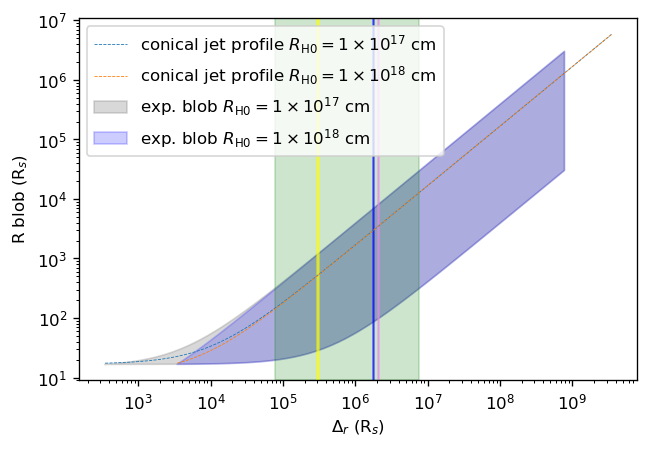

In [15]:
%matplotlib inline
size=3
#Delta_r=np.zeros(size)
#R=np.zeros(size)
delta_t_obs=np.logspace(-5,5,100)*u('d')
#delta_t_obs=np.linspace(0.01,7,100)*u('d')
beaming=eval_beaming(BulckFactor,theta)
R0=5E15
BulckFactor=25
theta=np.deg2rad(1.5)
fig=plt.figure(dpi=120)
beaming=eval_beaming(BulckFactor,theta)
print('beaming',beaming)
RS=Rs_radius(1E9).value

R_H0=1E17
Delta_r=eval_AB(delta_t_obs.to('s').value,BulckFactor,theta)+R_H0
y_min=eval_R(R0,0.001,delta_t_obs.to('s').value,beaming)
y_max=eval_R(R0,0.1,delta_t_obs.to('s').value,beaming)
plt.fill_between(Delta_r/RS,y_max/RS ,y_min/RS ,color='gray',alpha=0.3,label=r'exp. blob $R_{\rm H0}=1 \times10^{17}$ cm')

R_H0=1E18
Delta_r=eval_AB(delta_t_obs.to('s').value,BulckFactor,theta)+R_H0
y_min=eval_R(R0,0.001,delta_t_obs.to('s').value,beaming)
y_max=eval_R(R0,0.1,delta_t_obs.to('s').value,beaming)
plt.fill_between(Delta_r/RS,y_max/RS ,y_min/RS ,color='blue',alpha=0.2,label=r'exp. blob $R_{\rm H0}=1 \times10^{18}$ cm')



Dr=eval_AB( np.logspace(1,3,2)*86400,BulckFactor,theta)/RS
plt.axvspan(Dr[0],Dr[1], alpha=0.2, color='green')
pc_to_rs=constants.pc.cgs/RS




R_H0=1E17    
Dr=np.logspace(np.log10(R_H0),np.log10(1E24),100)/3E18
cp=conical_profile(Dr,1,R_H0/3E18,R0/3E18)
plt.plot(Dr*pc_to_rs,cp*pc_to_rs,'--',label=r'conical jet profile $R_{\rm H0}=1 \times10^{17}$ cm',lw=0.5)
R_H0=1E18
Dr=np.logspace(np.log10(R_H0),np.log10(1E24),100)/3E18
cp=conical_profile(Dr,1,R_H0/3E18,R0/3E18)
plt.plot(Dr*pc_to_rs,cp*pc_to_rs,'--',label=r'conical jet profile $R_{\rm H0}=1 \times10^{18}$ cm',lw=0.5)


dt1_mrk421=eval_AB((38.4-1.3)*u('d').to('s'),BulckFactor,theta)+R_H0
dt2_mrk421=eval_AB((38.4+1.3)*u('d').to('s'),BulckFactor,theta)+R_H0
dt1_mrk501=eval_AB((224.2-3.9)*u('d').to('s'),BulckFactor,theta)+R_H0
dt2_mrk501=eval_AB((224.2+3.1)*u('d').to('s'),BulckFactor,theta)+R_H0
dt1_3C273=eval_AB((264.3-6.5)*u('d').to('s'),BulckFactor,theta)+R_H0
dt2_3C273=eval_AB((264.3+6.2)*u('d').to('s'),BulckFactor,theta)+R_H0

plt.axvspan(dt1_mrk421/3E18*pc_to_rs.value,dt2_mrk421/3E18*pc_to_rs.value, alpha=0.5, color='yellow')
plt.axvspan(dt1_mrk501/3E18*pc_to_rs.value,dt2_mrk501/3E18*pc_to_rs.value, alpha=0.5, color='blue')
plt.axvspan(dt1_3C273/3E18*pc_to_rs.value,dt2_3C273/3E18*pc_to_rs.value, alpha=0.5, color='violet')


plt.xlabel(r'$\Delta_r$ (R$_s$)')
plt.ylabel('R blob (R$_s$)')
plt.legend(loc='best')
#plt.ylim(1)
plt.xscale('log')
plt.yscale('log')




In [16]:
fig.tight_layout()
fig.savefig('Estimate_par_from_obs/blob_size_vs_Delta_r_Rs.pdf',bbox_inches = 'tight',
    pad_inches = 0)

In [17]:
1E17*np.sqrt(15E45/1E45)/3E18

0.12909944487358058

In [18]:
1E17*np.sqrt(48E45/1E45)/3E18,1E17*np.sqrt(48E45/1E45)

(0.23094010767585033, 6.92820323027551e+17)